**Creator: Engin Deniz Alpman**

In [91]:
import numpy as np
import torch
import torch.tensor as tensor

## PyTorch Tensors:

* PyTorch tensors are very similar to numpy arrays, but numpy does not support GPU calculations and does not provide automated gradient calculations. 

## Broadcasting

* Broadcasting defines how arrays of different shapes are treated during calculation

[source](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html#:~:text=Rule%201%3A%20If%20the%20two,to%20match%20the%20other%20shape.)

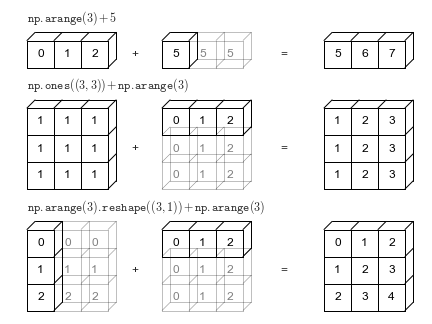

1) If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.

2) If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

3) If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

### Example 1

In [2]:
a = torch.ones((2,3))

In [3]:
b = tensor([1,2,3])

In [4]:
a

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [249]:
b

tensor([1, 2, 3])

In [250]:
a.shape

torch.Size([2, 3])

In [251]:
b.shape

torch.Size([3])

1) b.shape -> (1,3)

2) b.shape -> (2,3)

In [252]:
a2,b2 = np.broadcast_arrays(a,b)  

In [254]:
a2

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [255]:
x = np.array([[1], [2], [3]])
y = np.array([4, 5, 6])
b = np.broadcast(x, y)

In [256]:
b2

array([[1, 2, 3],
       [1, 2, 3]], dtype=int64)

### Example 2

In [257]:
a = torch.arange(3).view(3,1)

In [258]:
a

tensor([[0],
        [1],
        [2]])

In [259]:
a

tensor([[0],
        [1],
        [2]])

In [260]:
b = torch.arange(3)

In [261]:
b

tensor([0, 1, 2])

In [262]:
a.shape

torch.Size([3, 1])

In [263]:
b.shape

torch.Size([3])

1) 

b.shape -> (1,3)

2) 

a.shape -> (3,3)

b.shape -> (3,3)

In [264]:
a2,b2 = np.broadcast_arrays(a,b)  

In [265]:
a2

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2]], dtype=int64)

In [266]:
b2

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]], dtype=int64)

### Example 3

In [267]:
a = torch.ones(3,2)

In [268]:
a.shape

torch.Size([3, 2])

In [269]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [270]:
b = torch.arange(3)

In [271]:
b.shape

torch.Size([3])

In [272]:
b

tensor([0, 1, 2])

1)

b.shape -> (1,3)

2) 

b.shape - > (3,3)

a and b are not compatible for broadcasting

### Example 4

In [273]:
a = tensor([1,2,3])

In [274]:
b = torch.arange(9).view(3,3)

In [275]:
a.shape

torch.Size([3])

In [276]:
b.shape

torch.Size([3, 3])

In [277]:
a

tensor([1, 2, 3])

In [278]:
b

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [279]:
a2,b2 = np.broadcast_arrays(a,b)  

In [280]:
a2

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]], dtype=int64)

In [281]:
b2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int64)

In [282]:
a + b

tensor([[ 1,  3,  5],
        [ 4,  6,  8],
        [ 7,  9, 11]])

### Example 5

In [283]:
a

tensor([1, 2, 3])

In [284]:
a[None,:]

tensor([[1, 2, 3]])

In [285]:
a[None,:].shape

torch.Size([1, 3])

In [286]:
a[:,None].shape

torch.Size([3, 1])

In [287]:
a

tensor([1, 2, 3])

In [288]:
a2, b2 = np.broadcast_arrays(a[None,:], a[:,None])  

In [289]:
a2

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]], dtype=int64)

In [290]:
b2

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]], dtype=int64)

## PyTorch basic

* Number of dimensions:

0: Number, Scalar

1: Array, Vector

2: 2d-array, Matrix

n: nd-array, nd-tensor

* Tensors are n dimensional arrays, they can be 1 dimensional (scalar) or have any number of dimensions

* Tensors, unlike lists in python, can only contain **uniform types**

In [294]:
l = [1, 2., "a"]

In [295]:
tensor([1,2.])

tensor([1., 2.])

### Converting other structures to tensor

#### torch.tensor()

* It will create copy of the data into memory

In [296]:
l = np.array([1,2,3,4])

In [297]:
a = torch.tensor(l)

In [298]:
a = a + 1

In [299]:
a

tensor([2, 3, 4, 5], dtype=torch.int32)

In [300]:
l

array([1, 2, 3, 4])

#### torch.from_numpy()

* It will share memory with data, it has better performance

In [307]:
l = np.array([1, 2, 3, 4])

In [308]:
a = torch.from_numpy(l)

In [309]:
a

tensor([1, 2, 3, 4], dtype=torch.int32)

In [310]:
a[0] = 30

In [311]:
a

tensor([30,  2,  3,  4], dtype=torch.int32)

In [312]:
l

array([30,  2,  3,  4])

### Rank of the tensor

* Rank of the tensor is the number of dimensions present in a tensor

* Or we can say - Number of indexes required to access an element

### view()

* Or we can say that - Number of indeces required to access an element

* view is for reshaping our tensor

In [315]:
a

tensor([1, 2, 3, 4, 5, 6])

In [316]:
a.shape

torch.Size([6])

In [317]:
a.view(2,3)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [318]:
a.view(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [319]:
a.view(4,2)

RuntimeError: shape '[4, 2]' is invalid for input of size 6

* Multiplication of dimension sizes should be equal to the total number of elements inside a tensor

* Since total element size is known, we can infer a dimension from other dimensions

* we can do that inference with "-1"

In [320]:
a.view(-1,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

### Flatten

In [321]:
a = tensor([1,2,3,4,5,6,7,8,9,10,11,12]).view(4,3)

In [322]:
a

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [323]:
def flatten(t):
    return t.view(1, -1)

In [324]:
a = flatten(a)

In [325]:
a 

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

### squeeze

In [326]:
a.shape

torch.Size([1, 12])

In [327]:
a = a.view(1,12)

In [328]:
a

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

In [329]:
a.shape

torch.Size([1, 12])

In [330]:
a.squeeze()

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [331]:
a.squeeze().shape

torch.Size([12])

In [332]:
b = a.view(1,1,12)

In [333]:
b

tensor([[[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]]])

In [334]:
b.squeeze().shape

torch.Size([12])

In [335]:
c = a.view(1,1,12,1,1)

In [336]:
c.squeeze().shape

torch.Size([12])

### unsqueeze

In [337]:
a = tensor([1,2,3,4,5,6]).view(2,3)

In [338]:
a

tensor([[1, 2, 3],
        [4, 5, 6]])

In [339]:
a.unsqueeze(-1).shape

torch.Size([2, 3, 1])

In [340]:
a.unsqueeze(0).shape

torch.Size([1, 2, 3])

In [341]:
a.unsqueeze(1).shape

torch.Size([2, 1, 3])

In [342]:
a[None,:].shape

torch.Size([1, 2, 3])

In [343]:
a[:,None].shape

torch.Size([2, 1, 3])

In [344]:
a[...,None,:].shape

torch.Size([2, 1, 3])

### cat

* We are adding elements in existing axis

* Concatenation joins a tensros along an existing axis

In [345]:
t1 = torch.tensor([1,1,1])
t2 = torch.tensor([2,2,2])
t3 = torch.tensor([3,3,3])

In [346]:
torch.cat((t1,t2,t3), dim = 0)

tensor([1, 1, 1, 2, 2, 2, 3, 3, 3])

### stack

* It will create new axis and concatanate along that axis

* Stack joins a sequence of tensors along a new axis

In [347]:
torch.stack((t1,t2,t3))

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

* It is same as:

In [348]:
t1[None,:]

tensor([[1, 1, 1]])

In [349]:
torch.cat((t1[None,:], t2[None,:], t3[None,:]), dim = 0)

tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])

In [350]:
torch.cat((t1[None,:], t2[None,:], t3[None,:]), dim = 1)

tensor([[1, 1, 1, 2, 2, 2, 3, 3, 3]])

### Questions

**1)** We have three RGB images, how to join them to crete batch

- Stack them along a new axis, it will be the batch axis (we are adding different images, but now, our tensor only shows pixel values of different channels, we need to add 1 more dimension to represent different images, if we do not do that and concatenate, we would mess up the information)

**2)** We want to add new images to our batch

- Concat along batch axis